<a href="https://colab.research.google.com/github/FourLevel/Fubon_2024/blob/main/%E5%AF%8C%E9%82%A6%E5%9B%9E%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 下載五檔股票的歷史數據
stocks = ['1726.TW', '2474.TW', '3171.TWO', '4958.TW', '8103.TW']
stocks_2 = ['1726.TW', '2474.TW', '3171.TWO', '4958.TW', '8103.TW','^TWII']
start_date = '2024-01-01'
end_date = '2024-11-07'

# 取得股票數據
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
data_2 = yf.download(stocks_2, start=start_date, end=end_date)['Adj Close']
# 計算日報酬率
returns = data.pct_change().dropna()
returns_2 = data_2.pct_change().dropna()
# 計算期間大盤報酬率
TWII_return = (data_2['^TWII'].loc['2024-11-06'] - data_2['^TWII'].loc['2024-01-02']) / data_2['^TWII'].loc['2024-01-02']
print(f'大盤期間報酬率：{TWII_return}\n')      # period return


# 計算每檔股票的年化平均報酬和協方差矩陣
mean_returns = returns.mean() * 252  # 年化
mean_returns_2 = returns_2.mean() * 252  # 年化
cov_matrix = returns.cov() * 252  # 年化協方差矩陣
cov_matrix_2 = returns_2.cov() * 252  # 年化協方差矩陣


# 計算夏普比率，假設無風險利率為0.02
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.04):
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_volatility  # 最小化負的夏普比率

# 目標：最大化夏普比率，約束條件：權重總和為1，且每個權重大於0.1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # 權重總和為1
bounds = [(0.1, 1) for _ in range(len(stocks))]  # 每檔股票的權重在0.1和1之間

# 初始權重：均等分配
initial_weights = [1.0 / len(stocks)] * len(stocks)

# 使用最小化方法進行優化
opt_result = minimize(sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# 優化後的權重
optimal_weights = opt_result.x

# 顯示結果
# Format to 4 decimal places and convert back to float
formatted_optimal_weights = [float("{:.4f}".format(elem)) for elem in optimal_weights]
print(f"Optimal weights: {formatted_optimal_weights}")
print("Expected portfolio return:", np.sum(optimal_weights * mean_returns))
print("Expected portfolio volatility:", np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))))
print()
print(mean_returns_2)
print()
print(cov_matrix_2)

# print(TWII_returns)
# print(data)
# 繪製效率前緣
# 生成隨機投資組合
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (portfolio_return - 0.04) / portfolio_volatility  # 夏普比率

# 繪製圖表
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  6 of 6 completed
<ipython-input-1-f41a5d185664>:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_2 = data_2.pct_change().dropna()


大盤期間報酬率：0.30041969670035146

Optimal weights: [0.2547, 0.3324, 0.1227, 0.1, 0.1902]
Expected portfolio return: 0.2061867620097376
Expected portfolio volatility: 0.169060078828881

Ticker
1726.TW     0.105466
2474.TW     0.233770
3171.TWO    0.241002
4958.TW     0.096114
8103.TW     0.328261
^TWII       0.349888
dtype: float64

Ticker     1726.TW   2474.TW  3171.TWO   4958.TW   8103.TW     ^TWII
Ticker                                                              
1726.TW   0.013230  0.007474  0.005648  0.008815  0.008032  0.010946
2474.TW   0.007474  0.070733  0.005308  0.022249  0.014404  0.018564
3171.TWO  0.005648  0.005308  0.198723  0.024856  0.011575  0.020044
4958.TW   0.008815  0.022249  0.024856  0.123637  0.027531  0.034810
8103.TW   0.008032  0.014404  0.011575  0.027531  0.190794  0.029634
^TWII     0.010946  0.018564  0.020044  0.034810  0.029634  0.046786


KeyboardInterrupt: 

# 新增區段

Ticker
1726.TW     0.000043
2474.TW     0.000074
3171.TWO    0.000080
4958.TW     0.000138
8103.TW     0.000118
^TWII       0.000186
Name: ^TWII, dtype: float64
永記beta: 0.2340
可成beta: 0.3968
炎洲流通beta: 0.4284
臻鼎-KYbeta: 0.7440
瀚荃beta: 0.6334

年化大盤波動率: 0.2163
期間市場報酬: 0.3004
年化市場報酬: 0.3499
年化市場溢酬: 0.2604
投組beta: 0.4389
Treynor Ratio: 0.3786
Jensen's Alpha: 0.0519
sharpe ratio: 0.9770
benchmark sharpe ratio: 1.4327
M-squared: -0.0986


<ipython-input-40-3ed71c7e8056>:19: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  TWII_volatility = data_2['^TWII'].pct_change().dropna().std() * np.sqrt(252)
[*********************100%***********************]  5 of 5 completed


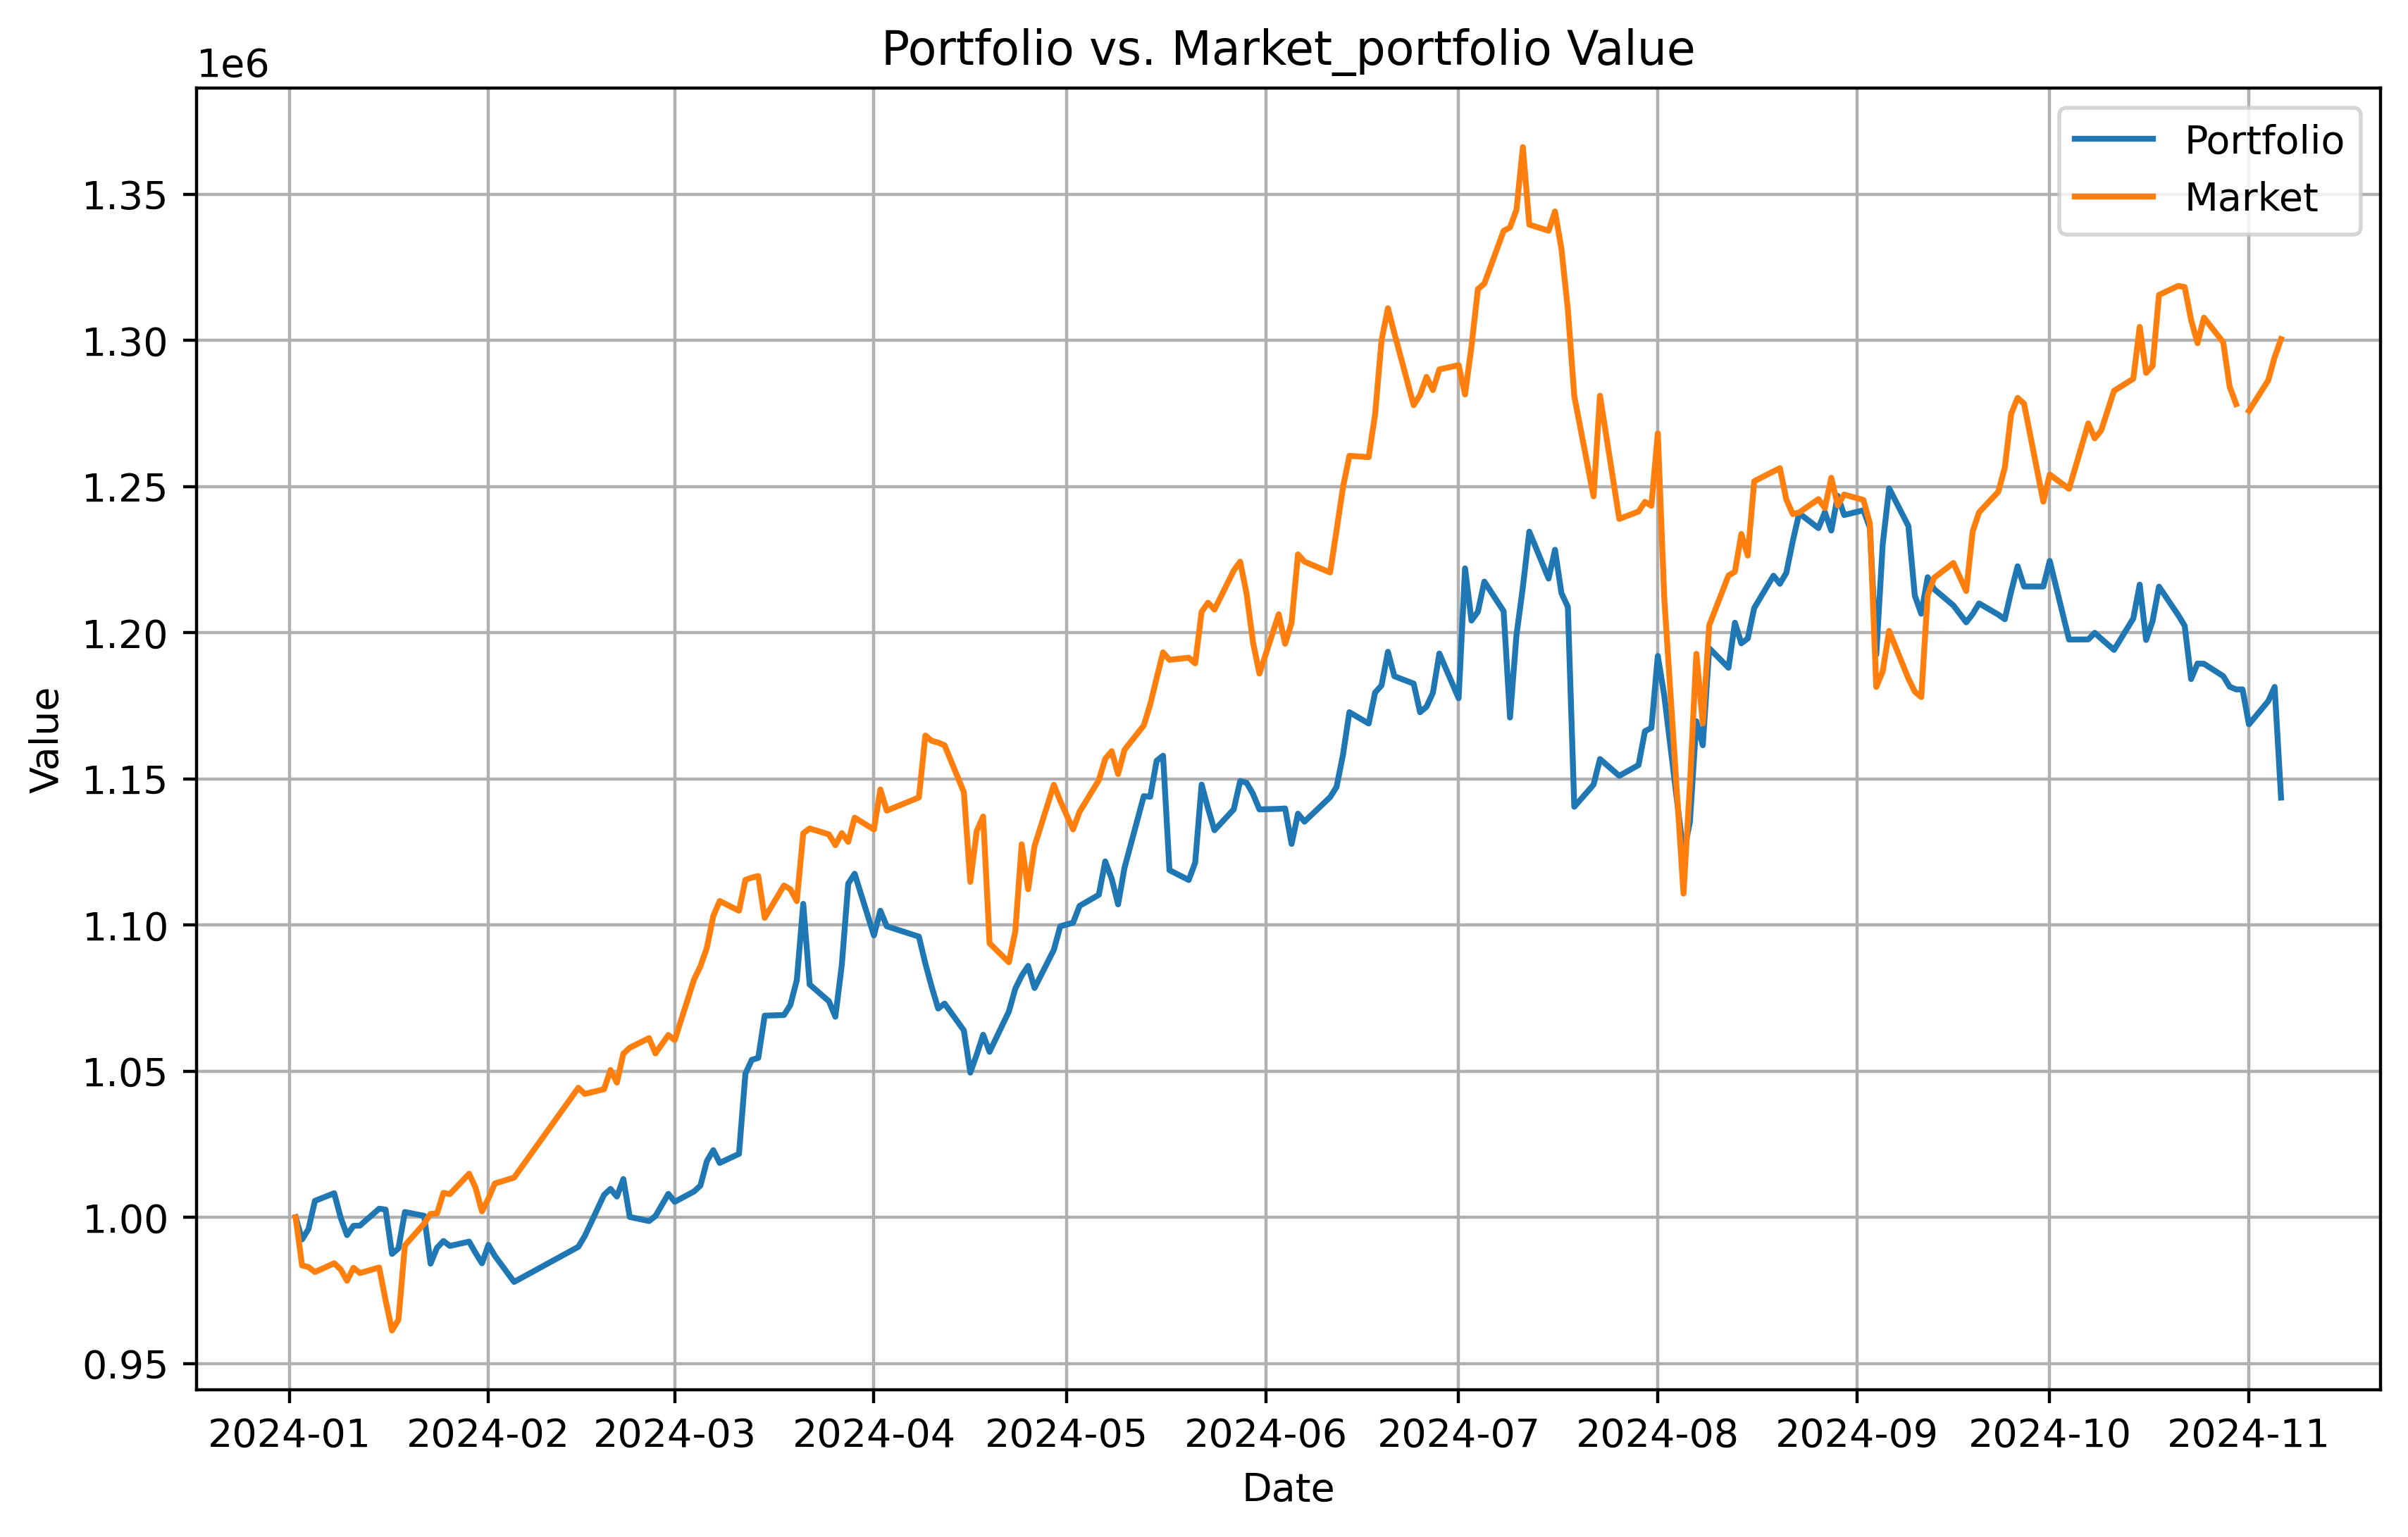

In [ ]:
#  計算投組/個股beta
covariances_with_twii = returns_2.cov()['^TWII']
print(covariances_with_twii)

beta_1726 = covariances_with_twii['1726.TW'] / covariances_with_twii['^TWII']
beta_2474 = covariances_with_twii['2474.TW'] / covariances_with_twii['^TWII']
beta_3171 = covariances_with_twii['3171.TWO'] / covariances_with_twii['^TWII']
beta_4958 = covariances_with_twii['4958.TW'] / covariances_with_twii['^TWII']
beta_8103 = covariances_with_twii['8103.TW'] / covariances_with_twii['^TWII']

print(f'永記beta: {beta_1726:.4f}')
print(f'可成beta: {beta_2474:.4f}')
print(f'炎洲流通beta: {beta_3171:.4f}')
print(f'臻鼎-KYbeta: {beta_4958:.4f}')
print(f'瀚荃beta: {beta_8103:.4f}')
print()

# 市場波動率
TWII_volatility = data_2['^TWII'].pct_change().dropna().std() * np.sqrt(252)
print(f'年化大盤波動率: {TWII_volatility:.4f}')
#市場溢酬
market_premium = TWII_return - 0.04
market_return_annualized = returns_2["^TWII"].mean() * 252  # 計算年化市場報酬

print(f'期間市場報酬: {TWII_return:.4f}')
print(f'年化市場報酬: {market_return_annualized:.4f}')  # 使用浮點數格式化
print(f'年化市場溢酬: {market_premium:.4f}')

# Assuming you have already calculated optimal_weights, beta_1726, beta_2474, beta_3171, beta_4958, beta_8103, and max_sharpe_return

# Calculate portfolio beta
portfolio_beta = np.sum(optimal_weights * [beta_1726, beta_2474, beta_3171, beta_4958, beta_8103])
print(f"投組beta: {portfolio_beta:.4f}")

# Calculate Treynor Ratio
treynor_ratio = (portfolio_return - 0.04) / portfolio_beta

# Print the result
print(f"Treynor Ratio: {treynor_ratio:.4f}")

jensen_alpha = portfolio_return - (0.04 + portfolio_beta * (TWII_return - 0.04))
print(f"Jensen's Alpha: {jensen_alpha:.4f}")

# Calculate portfolio return and volatility using optimal weights:
portfolio_return = np.sum(optimal_weights * mean_returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, weights)))

# 計算m-squared
portfolio_sharpe_ratio = (portfolio_return - 0.04) / portfolio_volatility
benchmark_sharpe_ratio = (mean_returns_2['^TWII'] - 0.04) / TWII_volatility


m_squared = (portfolio_sharpe_ratio - benchmark_sharpe_ratio) * TWII_volatility

print(f'sharpe ratio: {portfolio_sharpe_ratio:.4f}')
print(f'benchmark sharpe ratio: {benchmark_sharpe_ratio:.4f}')
print(f"M-squared: {m_squared:.4f}")

#  匯出至excel

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# AFTER your code that generates the values, create the DataFrame:
data = {
    '項目': ['永記beta', '可成beta', '炎洲流通beta', '臻鼎-KYbeta', '瀚荃beta', '大盤波動率', '市場溢酬', '投組beta', 'Treynor Ratio', "Jensen's Alpha", 'sharpe ratio', 'benchmark sharpe ratio', 'M-squared'],
    '數值': [0.2340, 0.3968, 0.4284, 0.7440, 0.6334, 0.2163, 0.2604, 0.4389, 0.4742, 0.0938, 0.8845, 1.4327, -0.1186
           ]}
df = pd.DataFrame(data)  # <- Define df before using it

df.to_excel('回測指標.xlsx', index=False)  # 請將 '你的 Excel 文件名稱' 替換為實際的文件名稱



# 假設起始投資金額為一百萬
initial_investment = 1000000

# 將 optimal_weights 轉換成 NumPy 陣列
optimal_weights = np.array(optimal_weights)

# 用 stock_prices 來代表從 yfinance 下載的股票價格資料
stock_prices = yf.download(stocks, start=start_date, end=end_date)['Adj Close'] # <-- Change here

# 確認 stock_prices 的列名和 optimal_weights 的順序一致
assert stock_prices.columns.tolist() == stocks, "data 的列名和 optimal_weights 的順序不一致" # <-- Change here

# 使用 stock_prices.values 提取 data 的 NumPy 陣列表示形式
portfolio_value = (stock_prices.values * optimal_weights).sum(axis=1) * initial_investment / (stock_prices.iloc[0].values * optimal_weights).sum() # <-- Change here

# 計算市場投資組合每日價值
market_value = data_2['^TWII'] * initial_investment / data_2['^TWII'].iloc[0]

# 建立DataFrame
portfolio_df = pd.DataFrame({'Portfolio Value': portfolio_value, 'Market Value': market_value})

# 繪製圖表
plt.figure(figsize=(10, 6), dpi=400)
plt.plot(portfolio_df.index, portfolio_df['Portfolio Value'], label='Portfolio')
plt.plot(portfolio_df.index, portfolio_df['Market Value'], label='Market')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Portfolio vs. Market_portfolio Value')
plt.legend()
plt.grid(True)  # 添加網格
plt.show()


# 新增區段